## Introdução

No contexto de Recursos Humanos, o  _turnover_  (ou rotatividade de pessoal) é o nome dado ao fluxo de entrada e saída de colaboradores em uma empresa. Esse índice é calculado a partir da relação entre o desligamento e a admissão de novas pessoas colaboradoras em um período de tempo (geralmente anual). Essa rotatividade engloba tanto os desligamentos voluntários como involuntários. O indicador de _turnover_  tem grande relevância para o sucesso do setor de RH, portanto, deve ser acompanhado de perto.

Para o cálculo efetivo do  _turnover_, usa-se a fórmula Total= (número de colaboradores contratados + número de colaboradores desligados de um mês) / 2;  _Turnover_  = [Total / (número total de colaboradores do mês anterior)] x 100. No geral, uma taxa de  _turnover_  de até 10% ao ano é considerada boa e possibilita que haja renovação na equipe.

## Objetivo

O objetivo deste projeto foi calcular a taxa de _turnover_, observando sua relação com as variáveis qualitativas e quantitativas presentes no banco de dados.

## Execução do Projeto

### Importando as bibliotecas necessárias

Para executar esta análise, é necessário instalar e importar as seguintes bibliotecas no seu projeto Python. As bibliotecas são:
- Pandas;
- NumPy;
- Pyplot;
- Seaborn;
- Scorecardpy.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as srd

### Compreendendo a base de dados

Para esta análise, vamos utilizar a base de dados chamada "base_turnover.csv", O arquivo contem 1471 linhas e 21 colunas, sendo a primeira o identificador único de cada colaborador (ID) e as demais, variáveis qualitativas e quantitativas, sendo as seguintes variáveis.

- ID;
- Funcionário_deixou_a_empresa;
- Idade;
- Frequência_de_Viagens;
- Distância_do_trabalho	Formação;
- ESat;
- Gênero;
- Estado_Civil;
- Salário;
- Qte_Empresas_Trabalhadas;
- Faz_hora_extras?;
- Perc_de_aumento;
- Qte_ações_da_empresa;
- Tempo_de_carreira;
- Horas_de_treinamento;
- Equilibrio_de_Vida;
- Tempo_de_empresa;
- Anos_no_mesmo_cargo;
- Anos_desde_a_ultima_promocao;
- Anos_com_o_mesmo_chefe.


In [116]:
# Importando a base de dados em um Data Frame
df = pd.read_csv(r'C:\Users\danie\OneDrive\Documentos\base_turnover.csv', sep=",", encoding='latin1')

# Checando as primeiras linhas do Data Frame
df.head()

,ID,Funcionário_deixou_a_empresa,Idade,Frequência_de_Viagens,Distância_do_trabalho,Formação,ESat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2


In [117]:
# Verificando as informações básicas do Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            1470 non-null   int64 
 1   Funcionário_deixou_a_empresa  1470 non-null   object
 2   Idade                         1470 non-null   int64 
 3   Frequência_de_Viagens         1470 non-null   object
 4   Distância_do_trabalho         1470 non-null   int64 
 5   Formação                      1470 non-null   object
 6   ESat                          1470 non-null   object
 7   Gênero                        1470 non-null   object
 8   Estado_Civil                  1470 non-null   object
 9   Salário                       1470 non-null   int64 
 10  Qte_Empresas_Trabalhadas      1470 non-null   int64 
 11  Faz_hora_extras?              1470 non-null   object
 12  Perc_de_aumento               1470 non-null   int64 
 13  Qte_ações_da_empre

### Tratamento dos dados

Nesta etapa, é importante verificar a integridade dos dados e em caso de informações duplicadas ou dados faltantes, os casos devem ser analisados com profundidade e seja definido qual o tratamento necessário em cada um deles. 

No caso deste estudo, foi verificado que os dados estavam íntegros, sem necessidade de tratamentos.

In [118]:
# Checando se existem valores duplicados no Data Frame
duplicadas = df.duplicated().sum()
duplicatas

0

In [119]:
# Checando a existência de valores nulos no Data Frame
valores_nulos= df.isna().sum()
valores_nulos

ID                              0
Funcionário_deixou_a_empresa    0
Idade                           0
Frequência_de_Viagens           0
Distância_do_trabalho           0
Formação                        0
ESat                            0
Gênero                          0
Estado_Civil                    0
Salário                         0
Qte_Empresas_Trabalhadas        0
Faz_hora_extras?                0
Perc_de_aumento                 0
Qte_ações_da_empresa            0
Tempo_de_carreira               0
Horas_de_treinamento            0
Equilibrio_de_Vida              0
Tempo_de_empresa                0
Anos_no_mesmo_cargo             0
Anos_desde_a_ultima_promocao    0
Anos_com_o_mesmo_chefe          0
dtype: int64

### Análise Exploratória dos Dados

Nesta etapa iremos, através de uma análise descritivas das variáveis, compreender qual o índice de _turnover_ da empresa, assim como compreender, graficamente, o comportamento das variáveis numéricas, qualitativas e quantitativas, para compreendermos, de forma inicial, o comportamento e características da base em análise. 


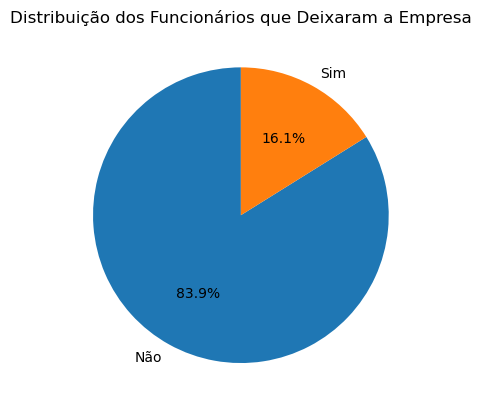

In [120]:
# Contar a frequência da variável 'Funcionário_deixou_a_empresa
frequencia = df['Funcionário_deixou_a_empresa'].value_counts()

# Criar o gráfico de pizza usando a frequência
fig, ax = plt.subplots()

ax.pie(frequencias.values, labels=frequencias.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribuição dos Funcionários que Deixaram a Empresa')
plt.show()

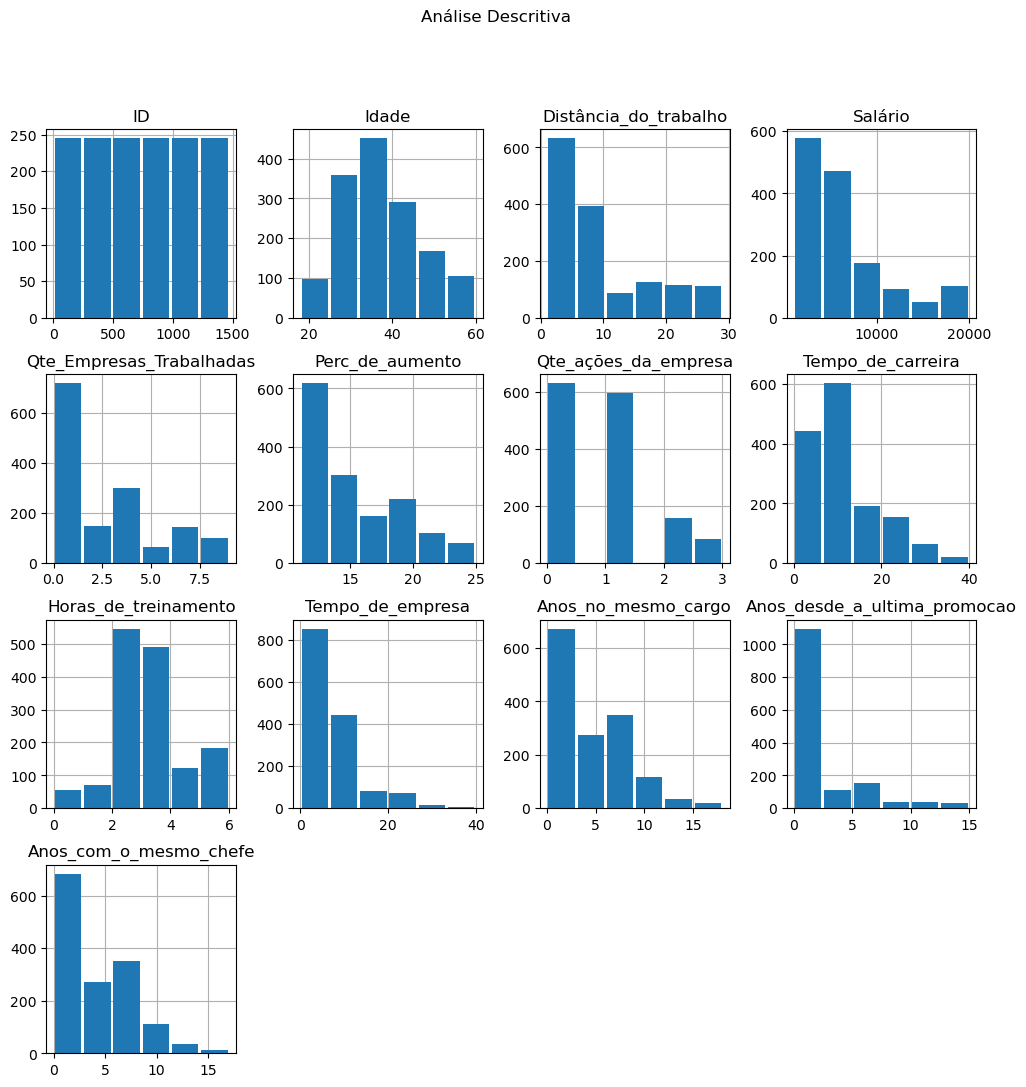

In [121]:
# Criar gráficos de histogramas para as variáveis numéricas quantitativas e qualitativas

ax = df.hist(bins=6, figsize=(12,12), zorder=2, rwidth=0.9)
plt.suptitle("Análise Descritiva")
plt.show()

### _Information Value (IV)_

O IV tem como objetivo analisar a explicabilidade de cada variável para que o nosso _target_ (variável de interesse) tenha o comportamento alvo do estudo. Neste caso, ter _turnover_.

A técnica que fornece a “força de associação” entre duas variáveis, devendo ser uma delas binária e podendo ser a outra, qualitativa ou quantitativa. Sendo definida entre forte, média, fraca e muito fraca, conforme tabela explicativa abaixo:

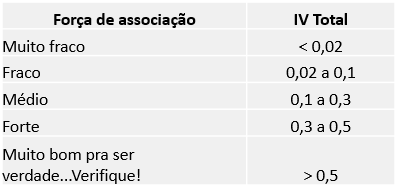

Neste estudo, iremos aprofundar as quatro variáveis mais fortes.

In [122]:
# Calcular o information value (IV)

value_iv = srd.iv(df, "Funcionário_deixou_a_empresa", positive="Sim")
value_iv

C:\Users\danie\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "Funcionário_deixou_a_empresa" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


,variable,info_value
7,Idade,0.541104
19,Tempo_de_carreira,0.451894
13,Tempo_de_empresa,0.408853
16,Faz_hora_extras?,0.400183
17,Anos_no_mesmo_cargo,0.321998
14,Qte_ações_da_empresa,0.319083
11,Anos_com_o_mesmo_chefe,0.304655
9,Estado_Civil,0.218898
0,Distância_do_trabalho,0.158776
6,Qte_Empresas_Trabalhadas,0.130967


### Detalhamento das variávels com força de associação forte.

A seguir, são apresentados um gráfico de pizza com a proporção das pessoas que deixaram a empresa de acordo com a variável 'Faz_hora_extras?' e gráficos de frequência para as variáveis 'Idade', 'Tempo_de_carreira', 'Tempo_de_empresa.'

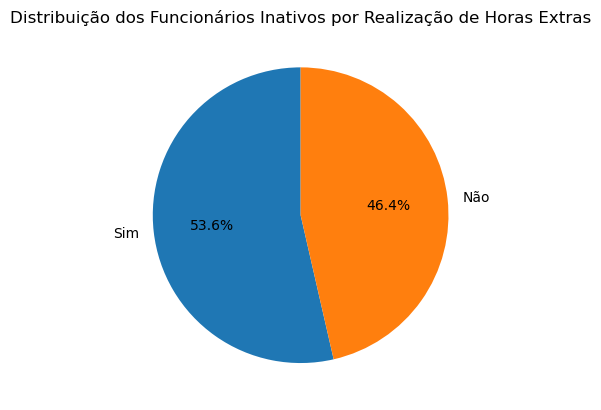

In [123]:
# Filtrar os funcionários que deixaram a empresa
df_inativos = df[df['Funcionário_deixou_a_empresa'] == "Sim"]

# Contar a frequência de horas extras entre os funcionários inativos
frequencia_horas_extras = df_inativos['Faz_hora_extras?'].value_counts()

# Criar o gráfico de pizza usando as frequências
fig, ax1 = plt.subplots()

ax1.pie(frequencia_horas_extras.values, labels=frequencia_horas_extras.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribuição dos Funcionários Inativos por Realização de Horas Extras')
plt.show()

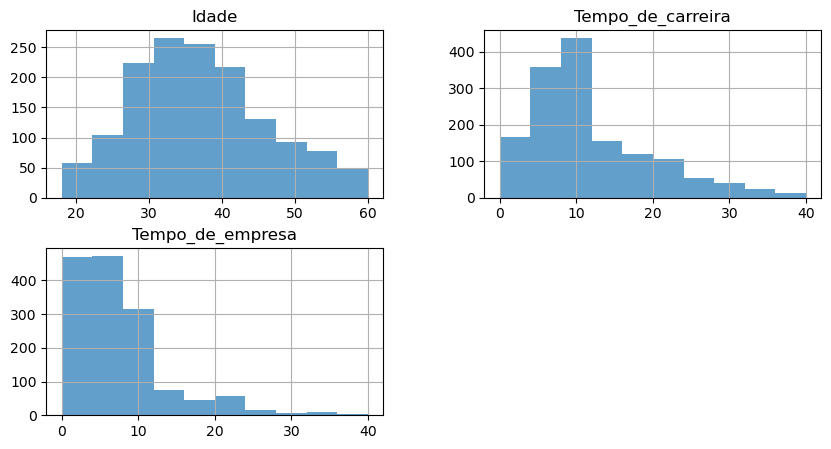

In [124]:
# Gerar histogramas para as colunas 'Idade' , 'Tempo_de_carreira' e Tempo_de_empresa
df[['Idade', 'Tempo_de_carreira', 'Tempo_de_empresa']].hist(bins=10, figsize=(10, 5), alpha=0.7)

# Exibir o gráfico
plt.show()

## Considerações Finais

A partir das análises realizadas pudemos ver que os fatores que mais influenciam o  _turnover_  da empresa são a idade, o tempo de carreira e empresa, além de fazer horas extra. Foi possível chegar a esta conclusão utilizando, além da análise descritiva, o _Information Value (IV)_.

Com este resultado em mãos, é possível elaborar um plano de ação que nos darão quais as ações que podem auxiliar na redução do índice de _turnover_ da empresa que, de acordo com as análises realizadas, é de 16,1%.

Uma sugestão de plano de ação pode ser encontrada no README deste estudo.